In [26]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import cv2
import seaborn as sns 

Please put the folders all in the same directory in jupyter notebook with no parent folder so that the **directories** would be correct when running the code. 

# 1. Capturing Frames 

In [27]:
alphabets = np.array(['A', 'B', 'C', 'D', 'E','F','G','H', 'I', 'J', 'K', 'L', 'M', 'N', 'O',
             'P', 'Q','R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])

In [ ]:
'''data_bsl = os.path.join('frames_coll')


for alphabet in alphabets:
    for video_number in range(4):
        try:
            os.makedirs(os.path.join(data_bsl, alphabet, str(video_number)))
        except:
            pass '''

In [ ]:
'''video = cv2.VideoCapture(0)

for alphabet in alphabets:
    for video_number in range(4):
        for frame_number in range(30):
            ret, frame = video.read()
            if frame_number ==0:
                cv2.putText(frame, 'Alphabet: {} | Starting to take frames for video number {}'.format(alphabet, video_number),
                            (15,12),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255),1, cv2.LINE_AA)
                cv2.imshow('Sign Language Translation', frame)
                cv2.waitKey(1000)
            else:
                cv2.putText(frame, 'frame number: {}'.format(frame_number),(15,12),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255),1, cv2.LINE_AA)
                cv2.imshow('Sign Language Translation', frame)
        
                cv2.waitKey(1000)
                
            
            frame_path = os.path.join(data_bsl, alphabet, str(video_number), f'{frame_number}.png')
            cv2.imwrite(frame_path,frame)
            
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
video.release()
cv2.destroyAllWindows()'''

# 2. Prepare the data

In [28]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [29]:
train_gen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=0.2)

test_gen = ImageDataGenerator(rescale= 1./255)

In [30]:
train_data = os.path.join('frames_coll','train')

In [31]:
test_data = os.path.join('frames_coll', 'test')

In [33]:
train_generator = train_gen.flow_from_directory(
    train_data,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle = True)

Found 2350 images belonging to 26 classes.


In [34]:
test_generator = test_gen.flow_from_directory(
    test_data,
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False)

Found 780 images belonging to 26 classes.


# 3. Time to build and train our model!

In [35]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Flatten, LSTM, Input, Bidirectional

In [36]:
model = Sequential()

In [37]:
model.add(Input((256,256,3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(26, activation='softmax'))

In [38]:
model.compile('adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [39]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                  │ (None, 254, 254, 32)          │         896 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_6 (MaxPooling2D)     │ (None, 127, 127, 32)          │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_7 (Conv2D)                  │ (None, 125, 125, 16)          │       4,624 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_7 (MaxPooling2D)     │ (None, 62, 62, 16)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_8 (Conv2D)                  │ (None, 60, 60, 32)            │       4,640 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_8 (MaxPooling2D)     │ (None, 30, 30, 32)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten_2 (Flatten)                │ (None, 28800)                 │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_8 (Dense)                    │ (None, 512)                   │  14,746,112 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_9 (Dense)                    │ (None, 1024)                  │     525,312 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_4 (Dropout)                │ (None, 1024)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_10 (Dense)                   │ (None, 512)                   │     524,800 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_5 (Dropout)                │ (None, 512)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_11 (Dense)                   │ (None, 26)                    │      13,338 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 15,819,722 (60.35 MB)

 Trainable params: 15,819,722 (60.35 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
log_dir = 'logs'
callbacks = tf.keras.callbacks.TensorBoard(log_dir = log_dir)

In [41]:

hist = model.fit(train_generator,steps_per_epoch = 100, epochs = 10, validation_data = test_generator,  validation_steps = 20,  callbacks = callbacks )

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.0616 - loss: 3.2734 - val_accuracy: 0.0594 - val_loss: 2.6423
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.1945 - loss: 2.3254 - val_accuracy: 0.5214 - val_loss: 1.2313
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.5565 - loss: 1.3389 - val_accuracy: 0.5688 - val_loss: 1.3772
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.7799 - loss: 0.7547 - val_accuracy: 0.8357 - val_loss: 0.3989
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.8531 - loss: 0.4995 - val_accuracy: 0.6438 - val_loss: 1.3304
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.8796 - loss: 0.4073 - val_accuracy: 0.7143 - val_loss: 0.8473
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9099 - loss: 0.2911 - val_accuracy: 0.6891 - val_loss: 1.0460
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9234 - loss: 0.2564 - val_accu

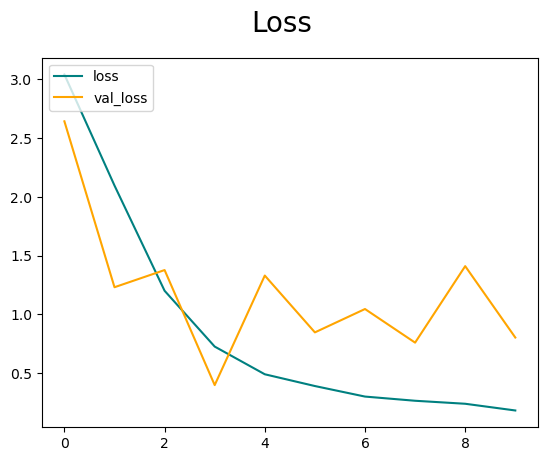

In [42]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

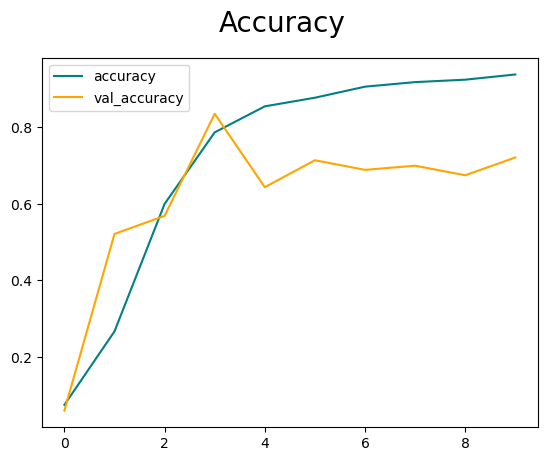

In [43]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## We have good results so far, but the model seems overfitting. Let's fix this!

## We are going to modify the code that I wrote above by:                                                             
1. Decrease the learning rate ( the default one was 0.001 )
2. Increasing the steps_per_epoch number.
3. Increasing the dropout number to 0.3


In [44]:
model2 = Sequential()

In [45]:
model2.add(Input((256,256,3)))
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(1024, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(26, activation='softmax'))

In [46]:
import keras 
optim = keras.optimizers.Adam(learning_rate = 0.0001)

In [47]:
model2.compile(optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [48]:

hist = model2.fit(train_generator,steps_per_epoch = 600 , epochs = 10, validation_data = test_generator,  validation_steps = 20,  callbacks = callbacks )

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 141s 209ms/step - accuracy: 0.0688 - loss: 3.1710 - val_accuracy: 0.1469 - val_loss: 2.8254
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 127s 192ms/step - accuracy: 0.1397 - loss: 2.6370 - val_accuracy: 0.0714 - val_loss: 2.1374
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 135s 208ms/step - accuracy: 0.2957 - loss: 2.1030 - val_accuracy: 0.4766 - val_loss: 1.6623
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 115s 173ms/step - accuracy: 0.4764 - loss: 1.5694 - val_accuracy: 0.5500 - val_loss: 1.0758
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 90s 139ms/step - accuracy: 0.5993 - loss: 1.2267 - val_accuracy: 0.6281 - val_loss: 1.1585
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 92s 140ms/step - accuracy: 0.6860 - loss: 0.9900 - val_accuracy: 0.8214 - val_loss: 0.4824
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 92s 142ms/step - accuracy: 0.7579 - loss: 0.7999 - val_accuracy: 0.7234 - val_loss: 0.9823
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 86s 131ms/step - accuracy: 0.8029 - los

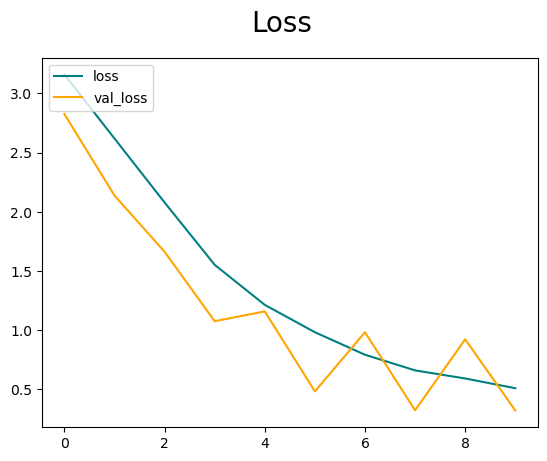

In [49]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

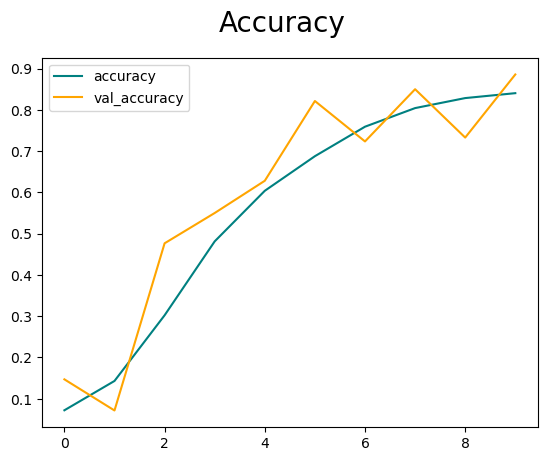

In [50]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## One of the reasons of overfitting is when our training data size is too small. We could take more pictures; however, to save time - and space - I prefer transfer learning. 

In [51]:
from tensorflow.keras.applications import mobilenet_v2
from tensorflow.keras.models import Model

In [52]:
tl_model = mobilenet_v2.MobileNetV2(include_top = False, weights = 'imagenet', input_shape = (256,256,3))

output = tl_model.layers[-1].output
output = Flatten()(output)
mobile = Model(tl_model.input, output)

mobile.trainable = False 
for layer in mobile.layers:
    layer.trainable = False

C:\Users\boure\AppData\Local\Temp\ipykernel_19704\2792762411.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  tl_model = mobilenet_v2.MobileNetV2(include_top = False, weights = 'imagenet', input_shape = (256,256,3))


In [53]:
TL = Sequential()

In [54]:
TL.add(mobile)
TL.add(Dense(32, activation='relu'))
TL.add(Dense(32, activation='relu'))
TL.add(Dropout(0.3))
TL.add(Dense(26, activation='softmax'))

In [55]:
import keras 
optim = keras.optimizers.Adam(learning_rate = 0.0001)

In [56]:
TL.compile(optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [57]:
TL.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ functional_53 (Functional)         │ ?                             │   2,257,984 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_16 (Dense)                   │ ?                             │ 0 (unbuilt) │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_17 (Dense)                   │ ?                             │ 0 (unbuilt) │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_8 (Dropout)                │ ?                             │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_18 (Dense)                   │ ?                             │ 0 (unbuilt) │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [58]:
hist = TL.fit(train_generator,steps_per_epoch = 300 , epochs = 10, validation_data = test_generator,  validation_steps = 20,  callbacks = callbacks )

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 105s 301ms/step - accuracy: 0.1811 - loss: 2.8281 - val_accuracy: 0.3828 - val_loss: 2.2692
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 91s 279ms/step - accuracy: 0.3409 - loss: 2.1323 - val_accuracy: 0.4000 - val_loss: 1.9296
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 102s 318ms/step - accuracy: 0.4408 - loss: 1.7215 - val_accuracy: 0.5969 - val_loss: 1.5362
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 91s 279ms/step - accuracy: 0.5862 - loss: 1.3500 - val_accuracy: 0.6286 - val_loss: 1.3810
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 100s 310ms/step - accuracy: 0.6459 - loss: 1.1041 - val_accuracy: 0.6844 - val_loss: 1.1590
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 92s 281ms/step - accuracy: 0.6971 - loss: 0.9582 - val_accuracy: 0.7214 - val_loss: 1.1242
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 101s 313ms/step - accuracy: 0.7538 - loss: 0.7887 - val_accuracy: 0.7234 - val_loss: 1.0485
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 92s 281ms/step - accuracy: 0.7916 - los

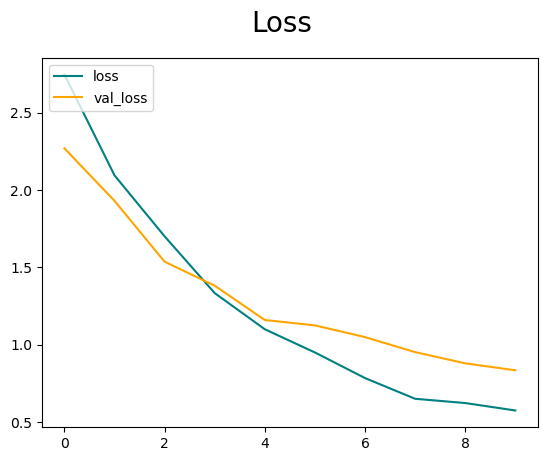

In [59]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

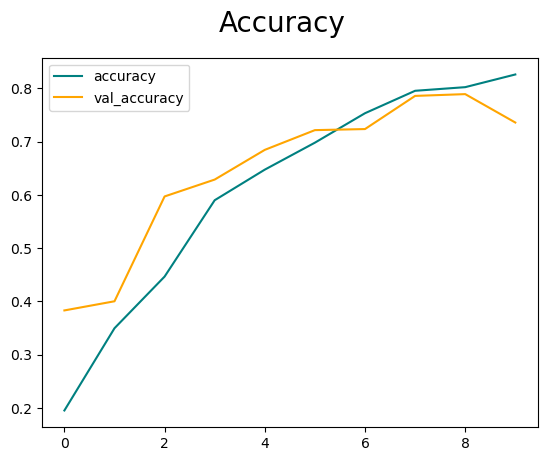

In [60]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [61]:
preds = alphabets[np.argmax(TL.predict(np.expand_dims(test_generator[0][0][0], axis = 0)))]
preds

test_generator[0][1][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [62]:
np.argmax(TL.predict(np.expand_dims(test_generator[0][0][0], axis = 0)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


0

## Wow it's already a lot better! The model is not overfitting anymore. However, it is taking so much time to train the model by having an image dataset, while we only need the positions of the fingers. In order to get that, we will use mediapipe to extract the landmarks and predict the signs based on that.

In [ ]:
import mediapipe as mp
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split 

In [5]:
mp_model = mp.solutions.holistic 
mp_draw = mp.solutions.drawing_utils

In [6]:
def detecting_landmarks(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False 
    results = model.process(image)
    image.flags.writeable = True 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [7]:
def draw_connections(image, results):
    mp_draw.draw_landmarks(image, results.right_hand_landmarks, mp_model.HAND_CONNECTIONS)
    mp_draw.draw_landmarks(image, results.left_hand_landmarks, mp_model.HAND_CONNECTIONS)

In [8]:
def get_coordinates(results):
    right_hand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    left_hand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    keypoints = np.concatenate([right_hand, left_hand])
    return keypoints 

In [74]:
kppath = os.path.join('more_keypoints')

In [76]:
alphabets = np.array(['A', 'B', 'C', 'D', 'E','F','G','H', 'I', 'J', 'K', 'L', 'M', 'N', 'O',
             'P', 'Q','R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '-'])

In [77]:
'''for alphabet in alphabets:
    for video_number in range(40):
        try:
            os.makedirs(os.path.join(kppath, alphabet, str(video_number)))
        except:
            pass '''

In [79]:
'''video = cv2.VideoCapture(0)
model = mp_model.Holistic(min_detection_confidence = 0.3, min_tracking_confidence = 0.3)

for alphabet in alphabets:
    for video_number in range(40):
        for frame_number in range(10):
            ret, frame = video.read()
            image, results = detecting_landmarks(frame, model)
            draw_connections(image, results)
            
            if frame_number ==0:
                cv2.putText(image, 'Alphabet: {} | Starting to take frames for video number {}'.format(alphabet, video_number),
                            (50,50),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255),1, cv2.LINE_AA)
                cv2.imshow('Sign Language Translation', image)
                cv2.waitKey(2000)
            else:
                cv2.putText(image, 'frame number: {}'.format(frame_number),(15,12),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255),1, cv2.LINE_AA)
                cv2.imshow('Sign Language Translation', image)
                cv2.waitKey(10)
                
            keypoints = get_coordinates(results)
            kp_path = os.path.join(kppath, alphabet, str(video_number), str(frame_number))
            np.save(kp_path, keypoints)
            
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
video.release()
cv2.destroyAllWindows()'''

In [80]:
labels_dict = {label: num for num, label in enumerate(alphabets)}
labels_dict


{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 '-': 26}

In [513]:
from sklearn.utils import resample 

In [776]:
data, labels = [], []
for alphabet in alphabets:
    for video in range(40):
        one_video_keypoints = []
        for frame_num in range(0,10):
            extract_keypoints = np.load(os.path.join(kppath, alphabet, str(video),"{}.npy".format(frame_num)))
            one_video_keypoints.append(extract_keypoints)
        data.append(one_video_keypoints)
        labels.append(labels_dict[alphabet])

In [777]:
X = np.array(data)

In [778]:
X.shape

(1080, 10, 126)

In [779]:
len(labels)

1080

In [780]:
y = to_categorical(labels)

In [781]:
X, y = resample(X,y,n_samples = 30000 ,stratify = y, random_state = 42) #30000

In [782]:
len(y)

30000

In [783]:
from sklearn.model_selection import train_test_split

In [784]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [785]:
import keras 

In [786]:
X_train.shape


(24000, 10, 126)

In [787]:
y_test.shape

(6000, 27)

In [797]:
modellm = Sequential()
modellm.add(LSTM(32, return_sequences=True, activation='relu', input_shape=(10, 126)))
modellm.add(LSTM(32, return_sequences=True , activation='relu'))
modellm.add(LSTM(32, return_sequences=False , activation='relu'))
modellm.add(Flatten()) 
modellm.add(Dropout(0.3))
modellm.add(Dense(27, activation='softmax'))
            
    

C:\Users\boure\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [798]:
modellm.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

In [799]:
modellm.summary()

Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ lstm_154 (LSTM)                    │ (None, 10, 32)                │      20,352 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ lstm_155 (LSTM)                    │ (None, 10, 32)                │       8,320 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ lstm_156 (LSTM)                    │ (None, 32)                    │       8,320 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten_49 (Flatten)               │ (None, 32)                    │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_52 (Dropout)               │ (None, 32)                    │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_53 (Dense)                   │ (None, 27)                    │         891 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 37,883 (147.98 KB)

 Trainable params: 37,883 (147.98 KB)

 Non-trainable params: 0 (0.00 B)

In [800]:
hist = modellm.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test) )

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.3002 - loss: 2.3663 - val_accuracy: 0.7270 - val_loss: 0.8177
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.7304 - loss: 0.7920 - val_accuracy: 0.8888 - val_loss: 0.2997
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.8231 - loss: 0.5017 - val_accuracy: 0.9252 - val_loss: 0.1955
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.8618 - loss: 0.3987 - val_accuracy: 0.9578 - val_loss: 0.1227
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.8465 - loss: 0.4879 - val_accuracy: 0.9362 - val_loss: 0.1703
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.8974 - loss: 0.2900 - val_accuracy: 0.9420 - val_loss: 0.1572
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.9089 - loss: 0.2670 - val_accuracy: 0.9755 - val_loss: 0.0736
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9264 - loss: 0.2214 - 

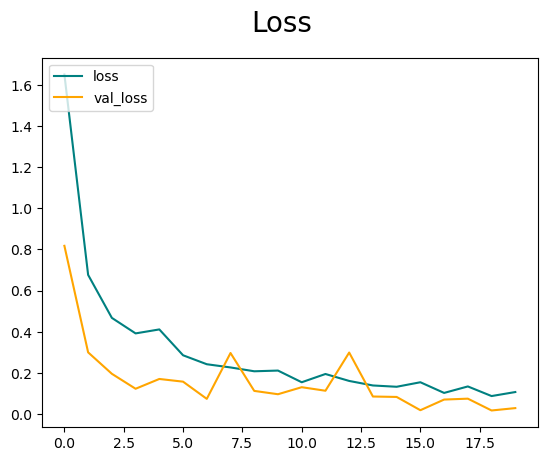

In [803]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

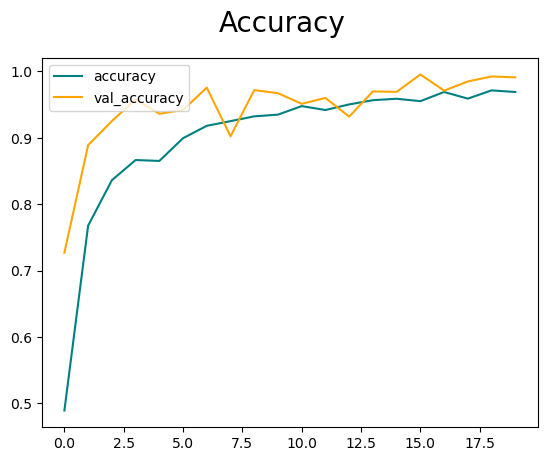

In [804]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')

plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [775]:
modellm.save('sign.h5')

C:\Users\boure\anaconda3\lib\site-packages\keras\src\models\model.py:342: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  warnings.warn(


## That's much better and the bonus is: the training time was so short! 

In [805]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.9


cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_model.Holistic(min_detection_confidence=0.3, min_tracking_confidence=0.3) as holistic:
    while cap.isOpened():

        ret, frame = cap.read()
        if frame_no % 2 == 0:
            # Make detections
            image, results = detecting_landmarks(frame, holistic)
            print(results)

            # Draw landmarks
            draw_connections(image, results)

            # 2. Prediction logic
            keypoints = get_coordinates(results)
    #         sequence.insert(0,keypoints)
    #         sequence = sequence[:30]
            sequence.append(keypoints)
            sequence = sequence[-10:]

            if len(sequence) == 10:
                res = modellm.predict(np.expand_dims(sequence, axis=0))[0]


            #3. Viz logic
                if res[np.argmax(res)] > threshold: 
                    if len(sentence) > 0: 
                        if alphabets[np.argmax(res)] != sentence[-1]:
                            sentence.append(alphabets[np.argmax(res)])
                    else:
                        sentence.append(alphabets[np.argmax(res)])

                if len(sentence) > 27: 
                    sentence = sentence[-27:]
        frame_no +=1     
        cv2.rectangle(image, (0,0), (640, 40), (224, 224, 224), -1)
        cv2.putText(image, ''.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
<class 'med

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
<class 'medi

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
<class 'medi

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
<class 'medi

In [70]:
from vidgear.gears import CamGear

C:\Users\boure\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [71]:
model_lm = mp_model.Holistic(min_detection_confidence = 0.3, min_tracking_confidence = 0.3)

In [806]:
# working 
video = CamGear(source= "https://www.youtube.com/watch?v=VJj-DzfHSkQ", stream_mode = True, logging=True).start()
threshold = 0.98
words = []
characters = []
sequence = []
frame_no = 0
while True:
    if frame_no % 2 == 0:
        frame = video.read()
        image, results = detecting_landmarks(frame, model_lm)
        draw_connections(image, results)
        keypoints = get_coordinates(results)
        sequence.append(keypoints)
        sequence = sequence[-10:]
        if len(sequence) == 10:
            probs = modellm.predict(np.expand_dims(sequence, axis = 0))[0]
            pred = alphabets[np.argmax(probs)]
            if probs[ np.argmax(probs)] > threshold:
                if len(words) >0:
                    if pred != words[-1]:
                        words.append(pred)
                else:
                     words.append(pred)
                if len(characters) >0:
                    if words[-1] != characters[-1]:
                        characters.append(words)
                else:
                     characters.append(words)
            if len(words) >30:
                words = words[-30:]
    frame_no +=1
    cv2.rectangle(image, (0,0), (1920, 40), (224, 224, 224), -1)
    cv2.putText(image, ''.join(words), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1 , (0,0,255), 2, cv2.LINE_AA)
    cv2.imshow('OpenCV Feed', image)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


21:05:59 ::    Helper     :: WARNING  :: GStreamer not found!
21:05:59 ::    Helper     ::  DEBUG   :: Selecting `best` resolution for streams.
21:05:59 ::    CamGear    ::   INFO   :: Verifying Streaming URL using yt-dlp backend. Please wait...
21:06:01 ::    CamGear    ::   INFO   :: [Backend] :: Streaming URL is fully supported. Available Streams are: [144p, 360p, 720p, 1080p, best, worst]
21:06:01 ::    CamGear    ::  DEBUG   :: Using `best` resolution for streaming.
21:06:01 ::    CamGear    ::  DEBUG   :: YouTube source ID: `VJj-DzfHSkQ`, Title: `BSL Finger Spelling Quiz for Beginners: 30 Disney Characters`, Quality: `best`
21:06:01 ::    CamGear    ::  DEBUG   :: Enabling Threaded Queue Mode for the current video source!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━